In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [2]:
instrument=pd.read_csv("C:/Users/Sneha/Downloads/Musical_Instrument.csv",index_col="reviewTime",parse_dates=True)
digital=pd.read_csv("C:/Users/Sneha/Downloads/Digital_Music.csv",index_col="reviewTime",parse_dates=True)

In [3]:
digital.columns

Index(['reviewerID', 'asin', 'helpful', 'reviewText', 'overall', 'summary',
       'unixReviewTime', 'Sentiment', 'pos_score', 'neg_score', 'neu_score',
       'con_score', 'compound_score', 'Sentiment_sm', 'pos_score_sm',
       'neg_score_sm', 'neu_score_sm', 'con_score_sm', 'compound_score_sum'],
      dtype='object')

In [4]:
col=['reviewerID', 'helpful', 'reviewText','summary','unixReviewTime', 'Sentiment_sm','pos_score_sm', 'neg_score_sm', 'neu_score_sm', 'con_score_sm','compound_score_sum' ]
digital=digital.drop(col,axis=1)
instrument=instrument.drop(col,axis=1)

In [5]:
digi=digital[digital['Sentiment'].isin(['positive','negative'])].reset_index()
inst=instrument[instrument['Sentiment'].isin(['positive','negative'])].reset_index()

In [6]:
labels=[]
for i in range(len(digi.Sentiment)):
    if digi.Sentiment[i] =='positive':
        labels.append(int(1))
    elif digi.Sentiment[i] =='negative':
        labels.append(int(0))

digi["score"]=labels

In [7]:
labels=[]
for i in range(len(inst.Sentiment)):
    if inst.Sentiment[i] =='positive':
        labels.append(int(1))
    elif inst.Sentiment[i] =='negative':
        labels.append(int(0))

inst["score"]=labels

In [8]:
labell=[]
for i in range(len(digi.Sentiment)):
    if digi.Sentiment[i] =='positive':
        labell.append(int(0))
    elif digi.Sentiment[i] =='negative':
        labell.append(int(1))
digi['score_neg']=labell

In [9]:
labell=[]
for i in range(len(inst.Sentiment)):
    if inst.Sentiment[i] =='positive':
        labell.append(int(0))
    elif inst.Sentiment[i] =='negative':
        labell.append(int(1))
inst['score_neg']=labell

In [10]:
dp=digi[["reviewTime","score"]]
dp=dp.set_index("reviewTime")
dp=dp.resample('Q').sum()
dp=dp[:-3]

In [11]:
dn=digi[["reviewTime","neg_score"]]
dn=dn.set_index("reviewTime")
dn=dn.resample('Q').sum()
dn=dn[:-3]

In [12]:
ip=inst[["reviewTime","score"]]
ip=ip.set_index("reviewTime")
ip=ip.resample('Q').sum()
ip=ip[:-3]

In [13]:
iin=inst[["reviewTime","neg_score"]]
iin=iin.set_index("reviewTime")
iin=iin.resample('Q').sum()
iin=iin[:-3]

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_comp=seasonal_decompose(dp,period=4)
d_trend=ts_comp.trend
d_seasonal=ts_comp.seasonal
d_residual=ts_comp.resid

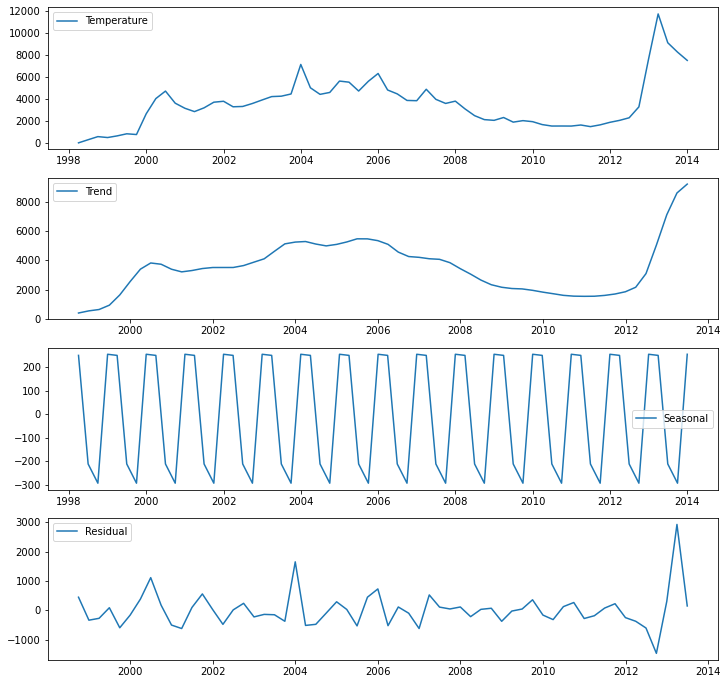

In [15]:
_,ax=plt.subplots(4,1,figsize=(12,12))
plt.subplot(411)
plt.plot(dp,label="Temperature")
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend()
plt.show()

In [16]:
def preprocess(data):
    ss = int(0.80 * len(data))

    train=data.iloc[:ss]
    test=data.iloc[ss:]

    #train_df = data.iloc[:ss]
    #test_df = data.iloc[ss:]
    
    #exog_train = train_df[['pos_score','neg_score','neu_score','con_score']]
    #exog_test = test_df[['pos_score','neg_score','neu_score','con_score']]
    
    pvalue=adfuller(train)[1]
    if pvalue < 0.05:
            print("Data is Stationary, Proceed to model building.")
    else:
            print("Data is not Stationary.Difference the data before model building.")
    

    return train,test

In [17]:
def stationarity(data):
        pvalue=adfuller(data)[1]
        if pvalue < 0.05:
            msg="Data is Stationary, Proceed to model building."
        else:
            msg="Data is not Stationary.Difference the data before model building."
        return(msg)

In [18]:
def acfpacf(data):
    ROWS = 1; COLS = 2
    fig,ax = plt.subplots(ROWS,COLS,figsize=(12,6))
    plot_acf(data, lags=10, ax=ax[0]);
    plt.title("Auto Correlation")

    plot_pacf(data, lags=5, ax=ax[1]);
    plt.title("Partial Auto Correlation")

    plt.show()

In [19]:
def hyperparametertuning(p,d,q,train,test):    
    p_val.append(p)
    q_val.append(q)
    d_val.append(d)
    
    model = sm.tsa.statespace.SARIMAX(train,order=(p,d,q),seasonal_order=(1,1,1,4)).fit()
    prediction = model.forecast(len(test))
    
    mse = mean_squared_error(test,prediction)
    rmse = np.sqrt(mse)
    rmse_val.append(rmse)

In [20]:
def modelbuild(p,d,q,train,test,data,title):
    model=sm.tsa.statespace.SARIMAX(train,order=(p,d,q),seasonal_order=(1,1,1,4)).fit()
    print(model.summary())

    prediction = model.forecast(len(test)+8)
    
    #compare=pd.DataFrame(test)
    #compare['Predicted']=prediction.values
    #print(compare)
    
    
    a=data.index[-1]
    #datetime_series = pd.Series(pd.date_range(a, periods=24 ,freq="M"))
    #future=pd.DataFrame({"date":datetime_series})
    #forecast=model.forecast(24,ex)
    #print(len(forecast))

    #future["Forecast"]=forecast.values
    #future=future.set_index("date")
    
    
    plt.figure(figsize=(15,6))
    plt.plot(prediction[:a], 'r', label = 'Prediction')
    plt.plot(prediction[a:],'orange', label = 'Forecast')
    plt.plot(data, 'b', label='Actual')
    plt.xlabel('Yearly wise changing sentiment')
    plt.ylabel('Total Count of '+str(title)+" sentiments")
    plt.legend()
    plt.show

    


# Digital Music - Positive

In [21]:
train,test=preprocess(dp)

Data is not Stationary.Difference the data before model building.


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


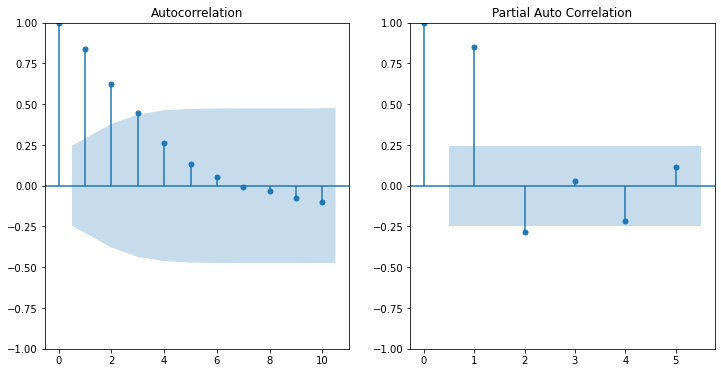

In [22]:
acfpacf(dp)

In [23]:
import warnings
warnings.filterwarnings('ignore')

p = [1,2]
q = [1,2,3]
d=[1,2,3]

p_val = []
q_val = []
d_val=[]
rmse_val = []

for i in p:
    for k in d:
            for j in q:
                hyperparametertuning(i,k,j,train,test)
        
df_eval = pd.DataFrame({'p':p_val,"d":d_val,'q':q_val,'rmse':rmse_val})
df_eval.sort_values(by='rmse',ascending=True).head(10)

,p,d,q,rmse
17,2,3,3,3561.592187
6,1,3,1,4057.556413
15,2,3,1,4178.384036
8,1,3,3,4820.207355
0,1,1,1,5545.712093
10,2,1,2,5554.875002
2,1,1,3,5619.484360
1,1,1,2,5620.800821
9,2,1,1,5631.787229
11,2,1,3,5735.483147


                                      SARIMAX Results                                      
Dep. Variable:                               score   No. Observations:                   51
Model:             SARIMAX(2, 3, 3)x(1, 1, [1], 4)   Log Likelihood                -365.101
Date:                             Thu, 24 Nov 2022   AIC                            746.202
Time:                                     10:22:06   BIC                            760.476
Sample:                                 03-31-1998   HQIC                           751.495
                                      - 09-30-2010                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3235      1.519      0.213      0.831      -2.654       3.301
ar.L2         -0.2571      

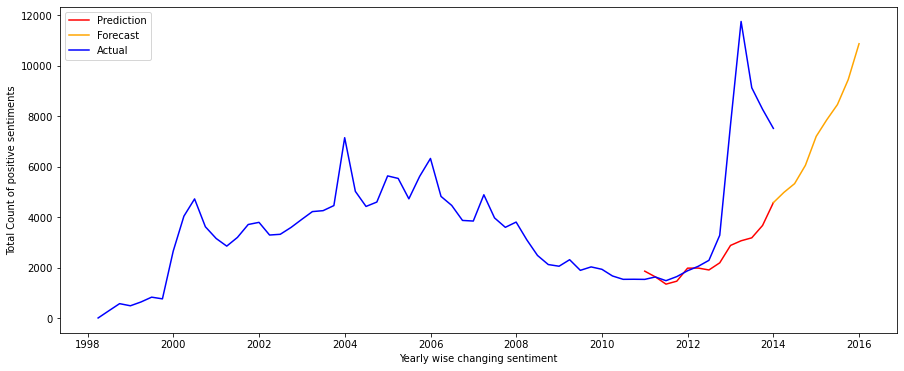

In [24]:
import statsmodels.api as sm
modelbuild(2,3,3,train,test,dp,"positive")

# Digital Music - Negative

In [25]:
train,test=preprocess(dn)

Data is not Stationary.Difference the data before model building.


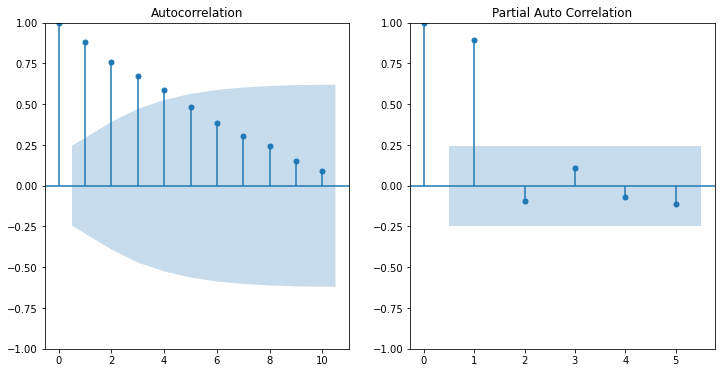

In [26]:
acfpacf(dn)

In [27]:
import warnings
warnings.filterwarnings('ignore')

p = [1,2]
q = [1,2,3]
d=[1,2,3]

p_val = []
q_val = []
d_val=[]
rmse_val = []

for i in p:
    for k in d:
            for j in q:
                hyperparametertuning(i,k,j,train,test)
        
df_eval = pd.DataFrame({'p':p_val,"d":d_val,'q':q_val,'rmse':rmse_val})
df_eval.sort_values(by='rmse',ascending=True).head(10)

,p,d,q,rmse
6,1,3,1,45.192462
15,2,3,1,45.718020
16,2,3,2,84.169543
8,1,3,3,92.921542
17,2,3,3,106.325766
10,2,1,2,125.668478
7,1,3,2,126.111494
0,1,1,1,129.515942
9,2,1,1,130.604951
11,2,1,3,131.995851


                                     SARIMAX Results                                     
Dep. Variable:                         neg_score   No. Observations:                   51
Model:             SARIMAX(1, 3, 1)x(1, 1, 1, 4)   Log Likelihood                -241.942
Date:                           Thu, 24 Nov 2022   AIC                            493.884
Time:                                   10:22:09   BIC                            502.805
Sample:                               03-31-1998   HQIC                           497.193
                                    - 09-30-2010                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4322      0.149     -2.891      0.004      -0.725      -0.139
ma.L1         -0.9997     63.215     -0.016

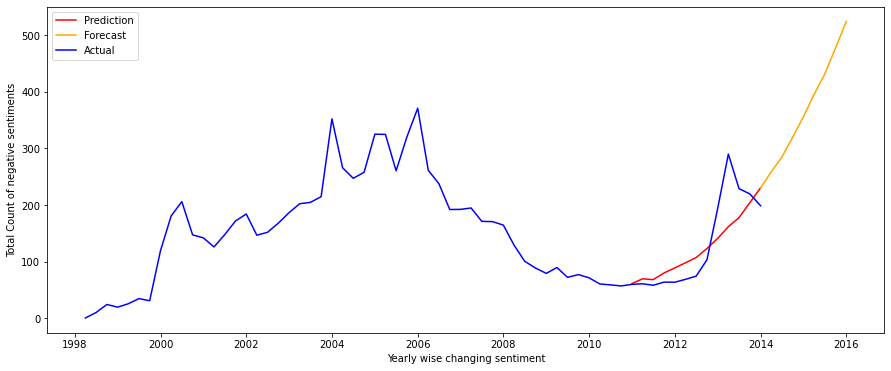

In [28]:
import statsmodels.api as sm
modelbuild(1,3,1,train,test,dn,"negative")

# Musical Instrument - Positive

In [29]:
train,test=preprocess(ip)

Data is not Stationary.Difference the data before model building.


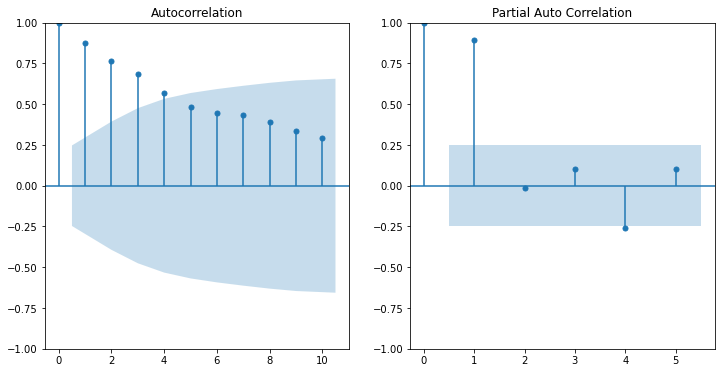

In [30]:
acfpacf(ip)

In [31]:
import warnings
warnings.filterwarnings('ignore')

p = [1,2]
q = [1,2,3]
d=[1,2,3]

p_val = []
q_val = []
d_val=[]
rmse_val = []

for i in p:
    for k in d:
            for j in q:
                hyperparametertuning(i,k,j,train,test)
        
df_eval = pd.DataFrame({'p':p_val,"d":d_val,'q':q_val,'rmse':rmse_val})
df_eval.sort_values(by='rmse',ascending=True).head(10)

,p,d,q,rmse
4,1,2,2,2164.693312
8,1,3,3,2170.326244
7,1,3,2,2197.856524
12,2,2,1,2233.739270
13,2,2,2,2248.716653
15,2,3,1,2468.819904
14,2,2,3,2487.116544
3,1,2,1,2597.019429
5,1,2,3,2809.214519
2,1,1,3,3049.632198


                                      SARIMAX Results                                      
Dep. Variable:                               score   No. Observations:                   50
Model:             SARIMAX(2, 3, 3)x(1, 1, [1], 4)   Log Likelihood                -305.607
Date:                             Thu, 24 Nov 2022   AIC                            627.214
Time:                                     10:22:14   BIC                            641.304
Sample:                                 06-30-1998   HQIC                           632.410
                                      - 09-30-2010                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3612      0.351      1.029      0.304      -0.327       1.049
ar.L2         -0.0104      

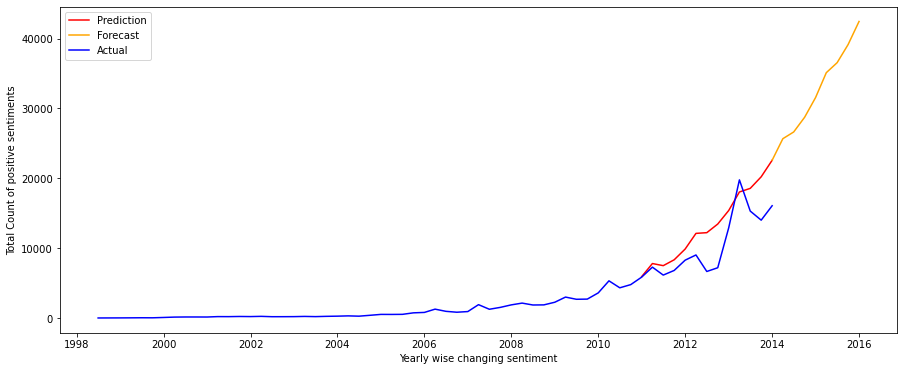

In [32]:
import statsmodels.api as sm
modelbuild(2,3,3,train,test,ip,"positive")

# Musical Instrument - Negative

In [33]:
train,test=preprocess(iin)

Data is not Stationary.Difference the data before model building.


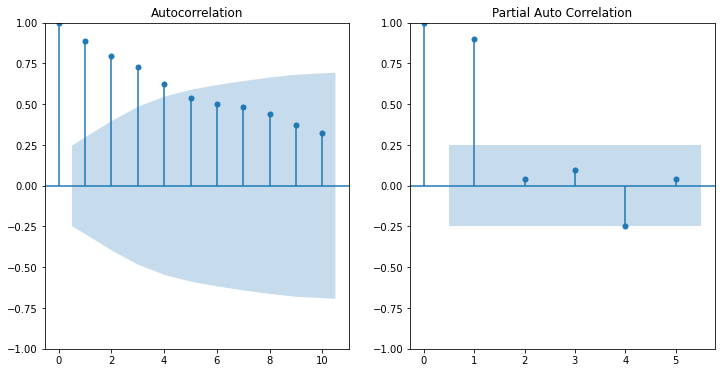

In [34]:
acfpacf(iin)

In [35]:
import warnings
warnings.filterwarnings('ignore')

p = [1,2]
q = [1,2,3]
d=[1,2,3]

p_val = []
q_val = []
d_val=[]
rmse_val = []

for i in p:
    for k in d:
            for j in q:
                hyperparametertuning(i,k,j,train,test)
        
df_eval = pd.DataFrame({'p':p_val,"d":d_val,'q':q_val,'rmse':rmse_val})
df_eval.sort_values(by='rmse',ascending=True).head(10)

,p,d,q,rmse
4,1,2,2,61.948790
14,2,2,3,63.542472
3,1,2,1,65.216355
0,1,1,1,71.810466
2,1,1,3,72.939155
7,1,3,2,76.751166
6,1,3,1,76.941693
1,1,1,2,77.681087
9,2,1,1,78.238395
13,2,2,2,79.160498


                                      SARIMAX Results                                      
Dep. Variable:                           neg_score   No. Observations:                   50
Model:             SARIMAX(1, 2, 2)x(1, 1, [1], 4)   Log Likelihood                -166.311
Date:                             Thu, 24 Nov 2022   AIC                            344.623
Time:                                     10:22:18   BIC                            355.328
Sample:                                 06-30-1998   HQIC                           348.593
                                      - 09-30-2010                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6515      0.391     -1.666      0.096      -1.418       0.115
ma.L1         -0.1659      

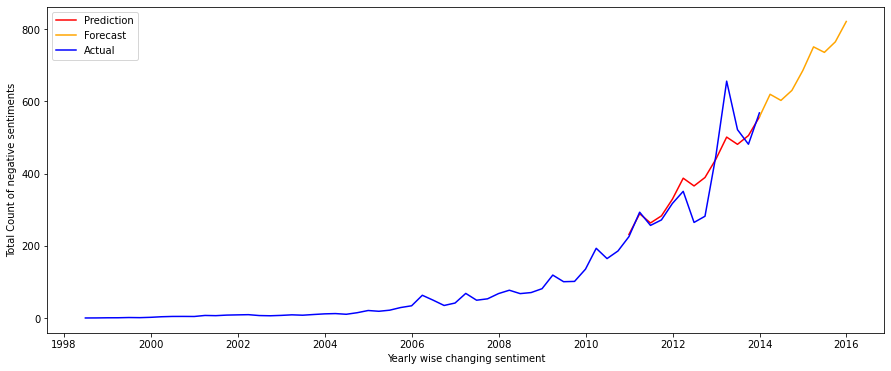

In [36]:
import statsmodels.api as sm
modelbuild(1,2,2,train,test,iin,"negative")

# Headphones

In [37]:
hp=instrument[instrument['asin']=='B000ULAP4U']

In [38]:
hp=hp[hp['Sentiment'].isin(['positive','negative'])].reset_index()


In [39]:
labels=[]
for i in range(len(hp.Sentiment)):
    if hp.Sentiment[i] =='positive':
        labels.append(int(1))
    elif hp.Sentiment[i] =='negative':
        labels.append(int(0))

hp["score"]=labels

In [40]:
hp=hp[["reviewTime","score"]]
hp=hp.set_index("reviewTime")
hp=hp.resample('Q').sum()
hp=hp[:-3]

In [41]:
train,test=preprocess(hp)

Data is not Stationary.Difference the data before model building.


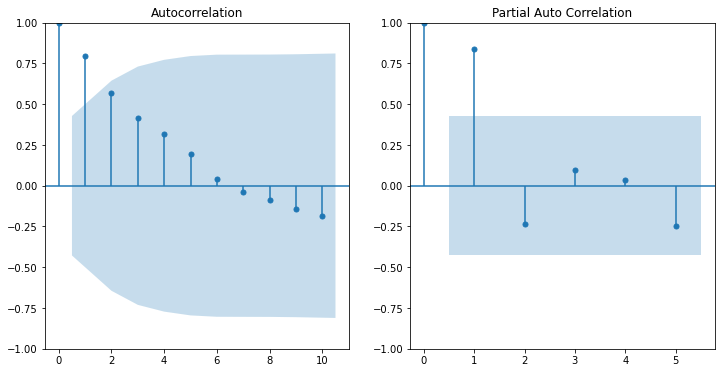

In [42]:
acfpacf(train)

In [43]:
import warnings
warnings.filterwarnings('ignore')

p = [1,2]
q = [1,2,3]
d=[1,2,3]

p_val = []
q_val = []
d_val=[]
rmse_val = []

for i in p:
    for k in d:
            for j in q:
                hyperparametertuning(i,k,j,train,test)
        
df_eval = pd.DataFrame({'p':p_val,"d":d_val,'q':q_val,'rmse':rmse_val})
df_eval.sort_values(by='rmse',ascending=True).head(10)

,p,d,q,rmse
7,1,3,2,95.732944
16,2,3,2,96.229295
8,1,3,3,104.931194
13,2,2,2,110.100799
5,1,2,3,110.121880
3,1,2,1,110.242482
4,1,2,2,110.399104
12,2,2,1,110.425327
14,2,2,3,110.736787
9,2,1,1,112.386482


                                      SARIMAX Results                                      
Dep. Variable:                               score   No. Observations:                   21
Model:             SARIMAX(1, 3, 2)x(1, 1, [1], 4)   Log Likelihood                 -57.678
Date:                             Thu, 24 Nov 2022   AIC                            127.356
Time:                                     10:22:22   BIC                            131.190
Sample:                                 06-30-2007   HQIC                           127.001
                                      - 06-30-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7876      0.363     -2.171      0.030      -1.499      -0.077
ma.L1         -1.9847    36

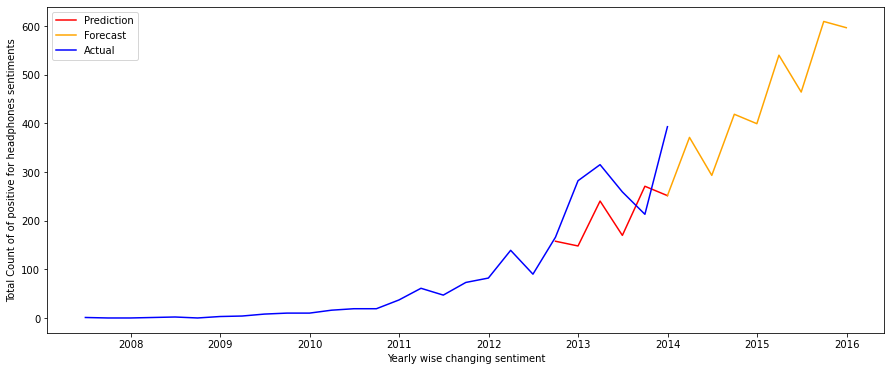

In [44]:
modelbuild(1,3,2,train,test,hp,"of positive for headphones")